In [1]:
import numpy as np
import pandas as pd
import random
import sklearn
from sklearn.decomposition import PCA
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings("ignore")


In [2]:
plt.rcParams['axes.unicode_minus'] = False  # 显示负号

In [3]:
# 加载测试集
data = pd.read_csv('ckd_test.csv')

missing_rows = data[data.isnull().any(axis=1)]
num_missing_rows = len(missing_rows)

print("Number of rows with missing values:", num_missing_rows)

Number of rows with missing values: 0


In [4]:
# 数据类型
data.dtypes

age      float64
bp         int64
sg         int64
al       float64
su       float64
rbc      float64
pc       float64
pcc      float64
ba         int64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc       int64
rbcc     float64
htn        int64
dm         int64
cad        int64
appet      int64
pe         int64
ane        int64
class      int64
dtype: object

In [5]:
ori_data = data.iloc[:, :-1]
df = pd.DataFrame(ori_data, columns=data.columns[:-1])
df['class'] = [int(k) for k in data['class']]

In [6]:
ori_data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,62.0,90,1,2.0,1.0,0.2,1.0,0.0,0,169.0,...,13.4,47.0,11000,6.1,1,0,0,1,0,0
1,50.0,70,1,3.0,0.0,0.0,1.0,1.0,1,123.0,...,11.1,36.0,4700,4.5,0,0,0,1,0,0
2,61.0,70,1,0.0,0.0,1.0,1.0,0.0,0,133.0,...,13.7,47.0,9200,4.9,0,0,0,1,0,0
3,67.0,70,1,1.0,0.0,1.0,1.0,0.0,0,138.2,...,6.1,19.0,6500,4.4,1,0,0,1,0,1
4,55.0,80,1,0.0,0.0,1.0,1.0,0.0,0,104.0,...,17.3,52.0,8200,4.8,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,50.0,80,1,1.0,1.2,1.0,0.6,0.0,0,219.0,...,8.6,24.0,13200,2.7,1,0,0,1,1,1
96,60.0,70,1,0.0,0.0,1.0,1.0,0.0,0,114.0,...,16.4,43.0,10800,5.7,0,0,0,1,0,0
97,50.0,80,1,0.0,0.0,1.0,1.0,0.0,0,97.0,...,14.2,48.0,10500,5.0,0,0,0,1,0,0
98,55.0,70,1,3.0,0.0,0.6,1.0,0.0,0,99.0,...,11.4,45.4,8080,5.3,0,0,0,0,1,0


In [7]:
print(df.dtypes)

age      float64
bp         int64
sg         int64
al       float64
su       float64
rbc      float64
pc       float64
pcc      float64
ba         int64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc       int64
rbcc     float64
htn        int64
dm         int64
cad        int64
appet      int64
pe         int64
ane        int64
class      int64
dtype: object


In [8]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,62.0,90,1,2.0,1.0,0.2,1.0,0.0,0,169.0,...,47.0,11000,6.1,1,0,0,1,0,0,1
1,50.0,70,1,3.0,0.0,0.0,1.0,1.0,1,123.0,...,36.0,4700,4.5,0,0,0,1,0,0,1
2,61.0,70,1,0.0,0.0,1.0,1.0,0.0,0,133.0,...,47.0,9200,4.9,0,0,0,1,0,0,0
3,67.0,70,1,1.0,0.0,1.0,1.0,0.0,0,138.2,...,19.0,6500,4.4,1,0,0,1,0,1,1
4,55.0,80,1,0.0,0.0,1.0,1.0,0.0,0,104.0,...,52.0,8200,4.8,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,50.0,80,1,1.0,1.2,1.0,0.6,0.0,0,219.0,...,24.0,13200,2.7,1,0,0,1,1,1,1
96,60.0,70,1,0.0,0.0,1.0,1.0,0.0,0,114.0,...,43.0,10800,5.7,0,0,0,1,0,0,0
97,50.0,80,1,0.0,0.0,1.0,1.0,0.0,0,97.0,...,48.0,10500,5.0,0,0,0,1,0,0,0
98,55.0,70,1,3.0,0.0,0.6,1.0,0.0,0,99.0,...,45.4,8080,5.3,0,0,0,0,1,0,1


In [9]:
print(df.dtypes)

age      float64
bp         int64
sg         int64
al       float64
su       float64
rbc      float64
pc       float64
pcc      float64
ba         int64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc       int64
rbcc     float64
htn        int64
dm         int64
cad        int64
appet      int64
pe         int64
ane        int64
class      int64
dtype: object


In [10]:
y_test = df.iloc[:, -1].to_numpy()
X_test = df.iloc[:, :-1].to_numpy()

In [11]:
# 设置随机种子
random_seed = 2024
random.seed(random_seed)
# 固定NumPy的随机种子
np.random.seed(random_seed)
# 固定Python的随机种子
sklearn.utils.check_random_state(random_seed)

RandomState(MT19937) at 0x15831D340

In [12]:
import joblib
loaded_svm = joblib.load('svm_model.pkl')
y_pred = loaded_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.94


评估指标作图

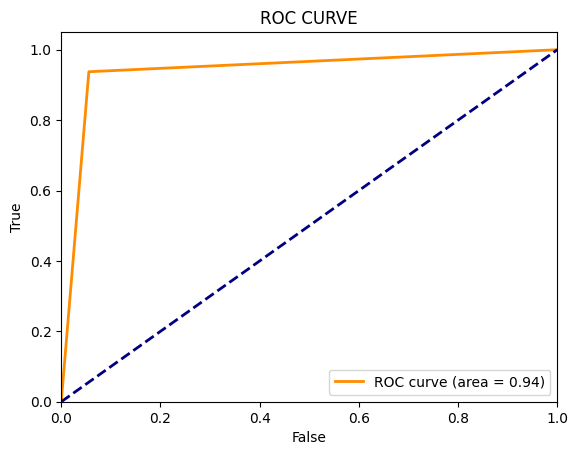

In [13]:
# 预测概率值
y_score = loaded_svm.predict(X_test)

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False')
plt.ylabel('True')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

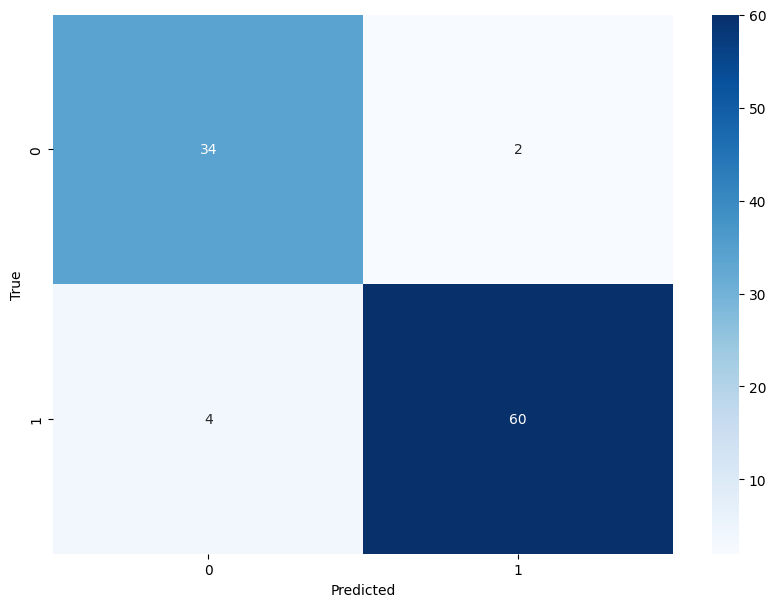

In [14]:
# 生成混淆矩阵
cm = confusion_matrix(y_test, y_score)

# 使用Seaborn绘制混淆矩阵的热图
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_score)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("accuracy:", accuracy)
print("precision:", precision)
print("recall:", recall)
print("f1:", f1)

accuracy: 0.94
precision: 0.967741935483871
recall: 0.9375
f1: 0.9523809523809523


In [16]:
loaded_pca = joblib.load('pca_model.pkl')
X_test_pca = loaded_pca.transform(X_test)
load_pca_svm = joblib.load('pca_svm_model.pkl')
y_pred = load_pca_svm.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.94


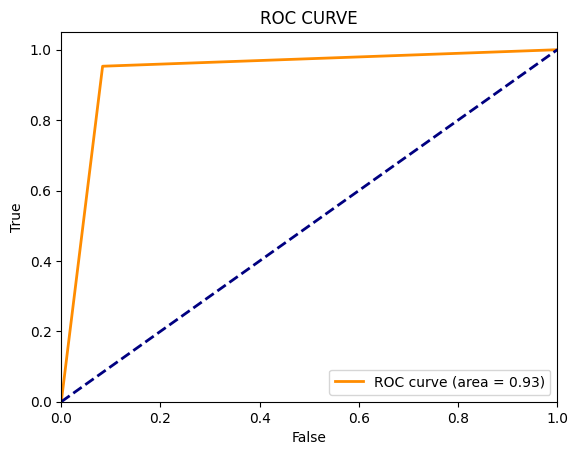

In [17]:
# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False')
plt.ylabel('True')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

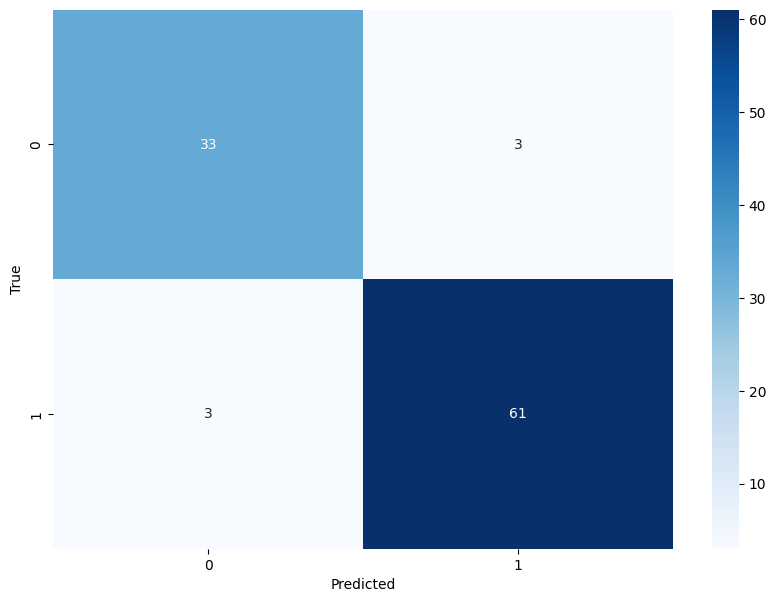

In [18]:
# 生成混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 使用Seaborn绘制混淆矩阵的热图
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("accuracy:", accuracy)
print("precision:", precision)
print("recall:", recall)
print("f1:", f1)

accuracy: 0.94
precision: 0.953125
recall: 0.953125
f1: 0.953125
